In [1]:
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=10)
safediv(x, y) = x==0 ? x : y==Inf ? zero(y) : x/y

safediv (generic function with 1 method)

https://twitter.com/03t_ms/status/1545720479868022784

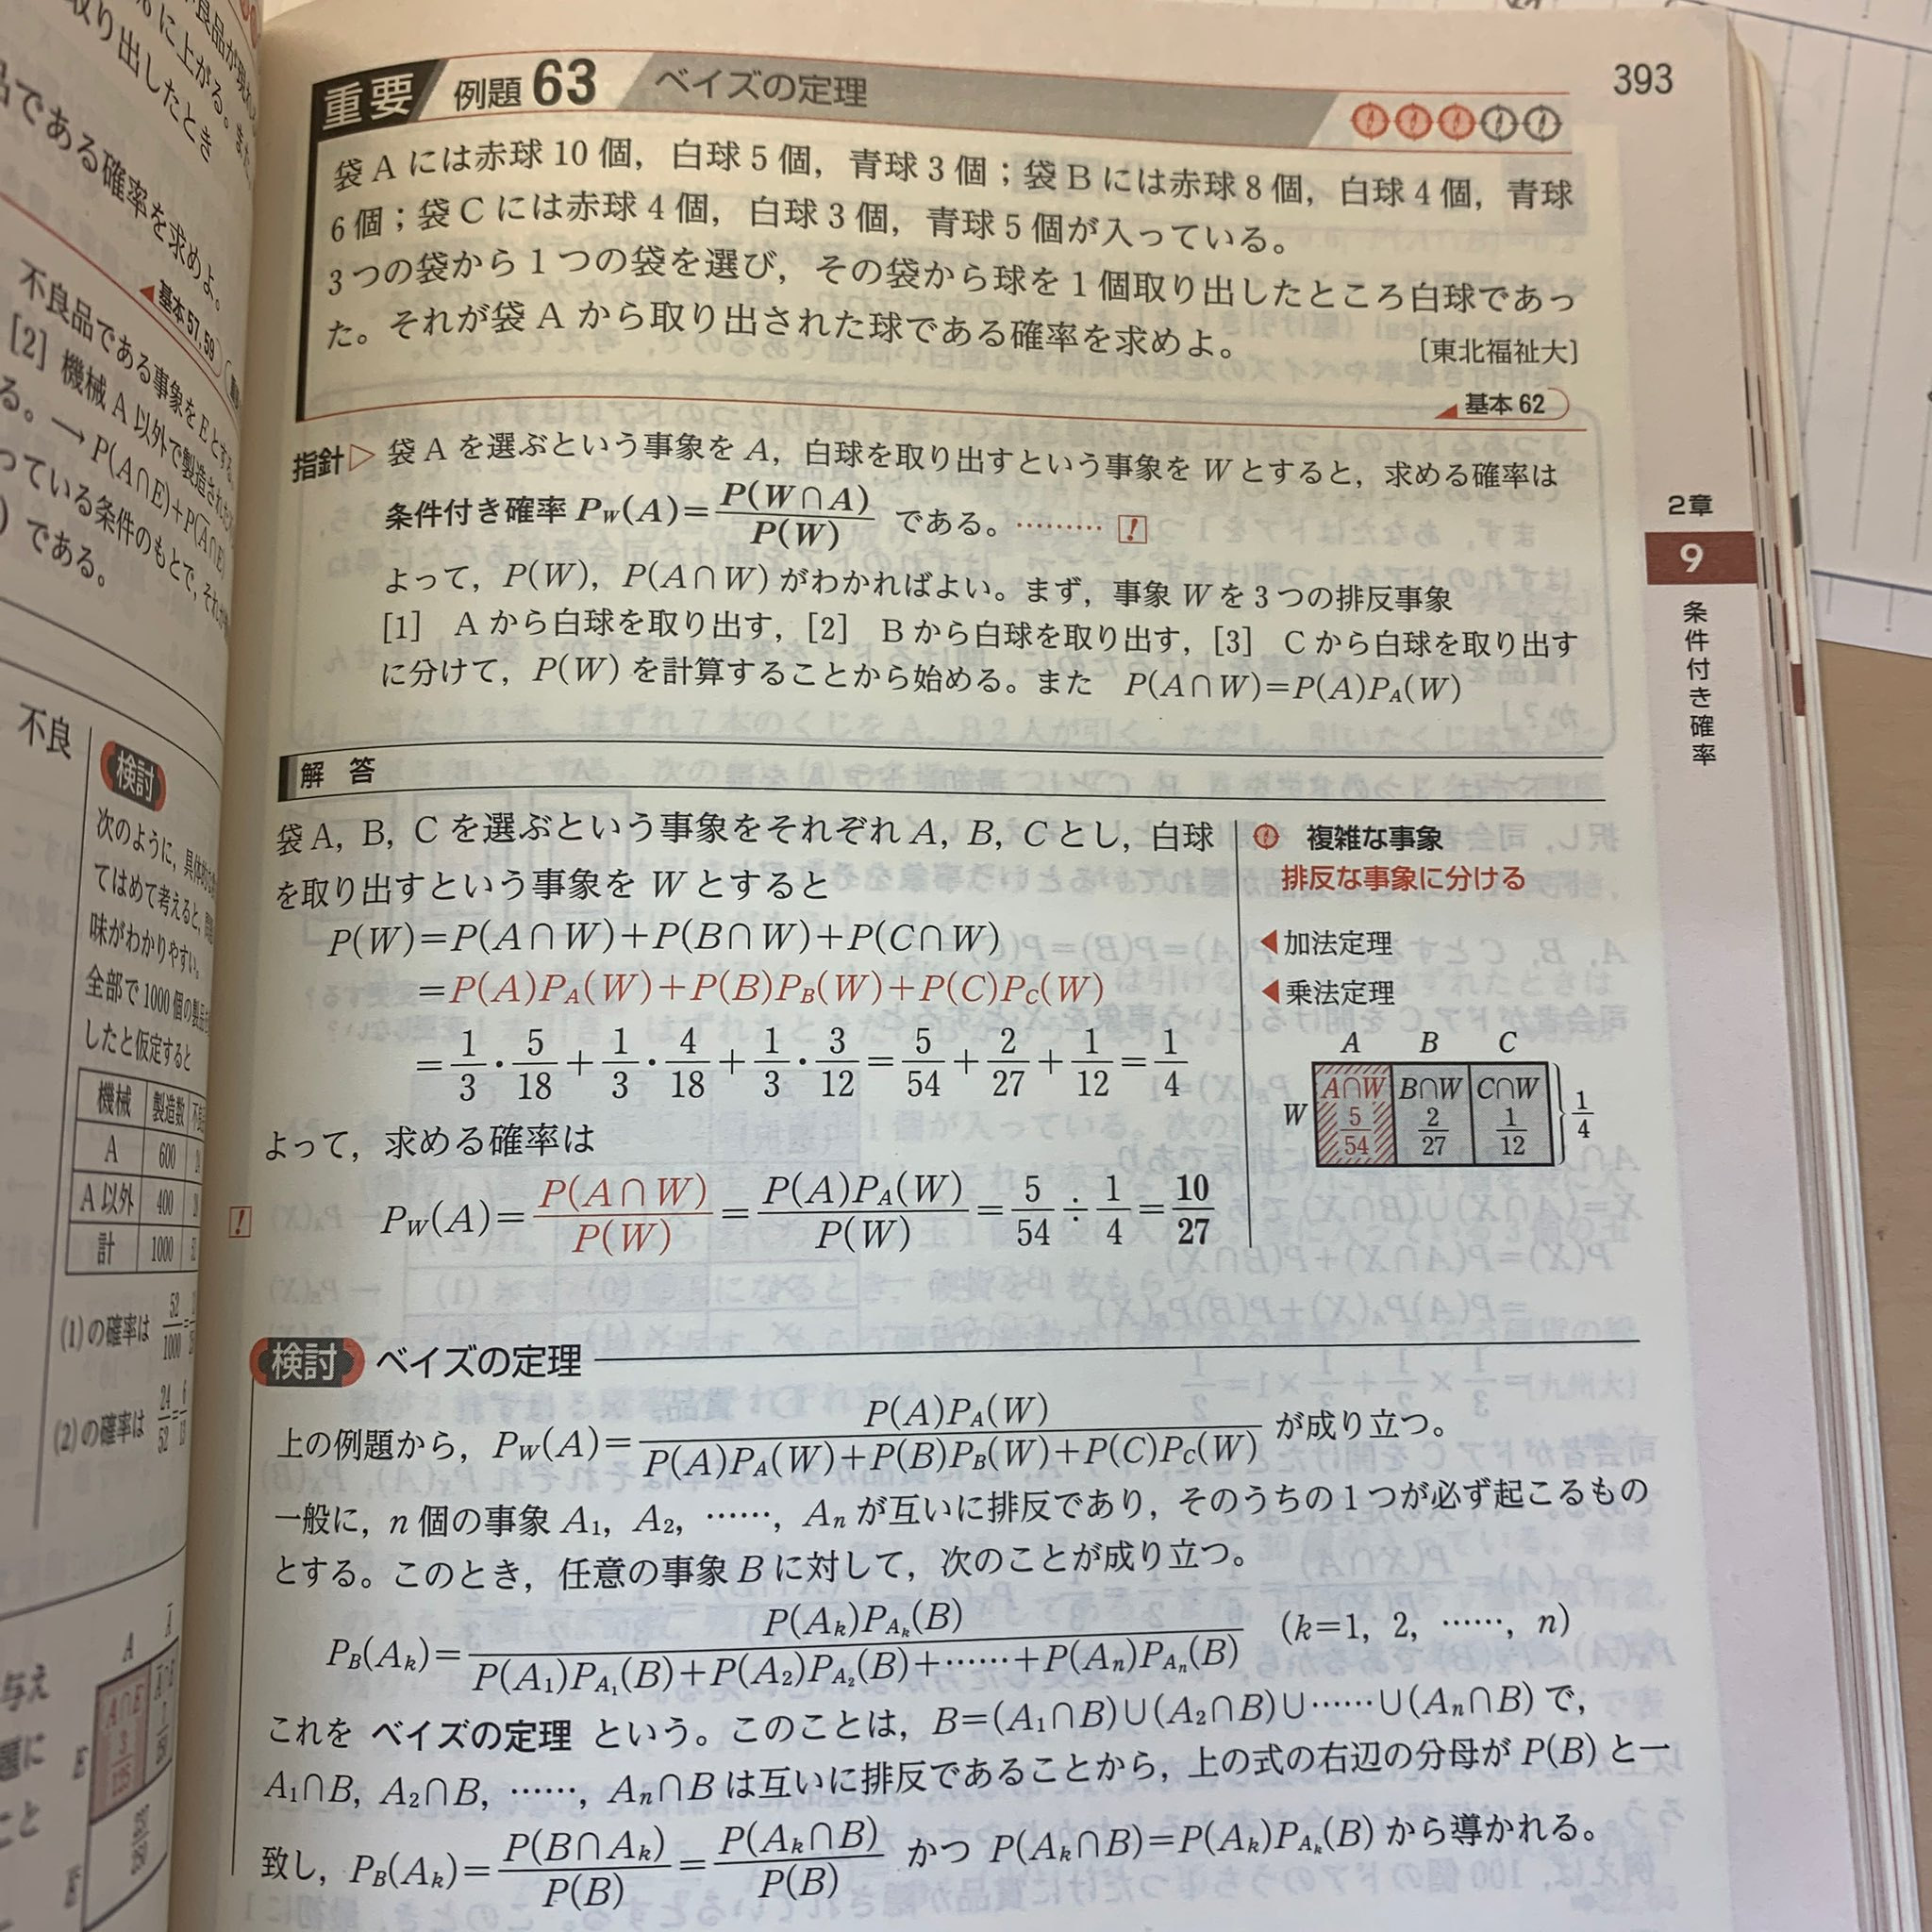

In [2]:
RWB = [
    10  5  3
     8  4  6
     4  3  5
]
Z = [1//3, 1//3, 1//3] .* RWB .// sum(RWB; dims=2)

3×3 Matrix{Rational{Int64}}:
 5//27  5//54  1//18
 4//27  2//27  1//9
 1//9   1//12  5//36

In [3]:
sum(Z; dims=2)

3×1 Matrix{Rational{Int64}}:
 1//3
 1//3
 1//3

In [4]:
sum(Z)

1//1

3×3 Matrix{Rational{Int64}}:
 5//27  5//54  1//18
 4//27  2//27  1//9
 1//9   1//12  5//36

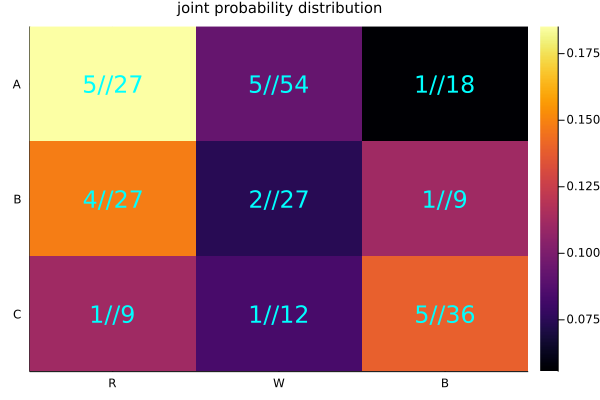

In [5]:
display(Z)

X = reverse(Z; dims=1)
xtick = (1:3, ["R", "W", "B"])
ytick = (1:3, reverse(["A", "B", "C"]))
ann = [(j, i, text(X[i,j], 16, :cyan, :center))
            for i in 1:3 for j in 1:3]
O1 = heatmap(X; xtick, ytick)
annotate!(ann)
title!("joint probability distribution")

In [6]:
sum(Z; dims=1)

1×3 Matrix{Rational{Int64}}:
 4//9  1//4  11//36

In [7]:
W = Z .// sum(Z; dims=1)

3×3 Matrix{Rational{Int64}}:
 5//12  10//27  2//11
 1//3    8//27  4//11
 1//4    1//3   5//11

In [8]:
sum(W; dims=1)

1×3 Matrix{Rational{Int64}}:
 1//1  1//1  1//1

3×3 Matrix{Rational{Int64}}:
 5//12  10//27  2//11
 1//3    8//27  4//11
 1//4    1//3   5//11

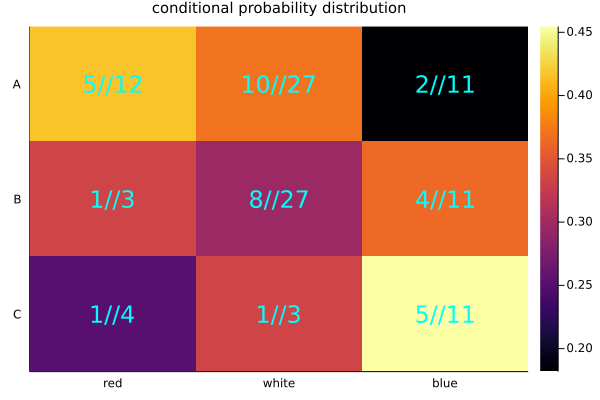

In [9]:
display(W)

X = reverse(W; dims=1)
xtick = (1:3, ["red", "white", "blue"])
ytick = (1:3, reverse(["A", "B", "C"]))
ann = [(j, i, text(X[i,j], 16, :cyan, :center))
            for i in 1:3 for j in 1:3]
O2 = heatmap(X; xtick, ytick)
annotate!(ann)
title!("conditional probability distribution")

1×3 Matrix{Rational{Int64}}:
 4//9  1//4  11//36

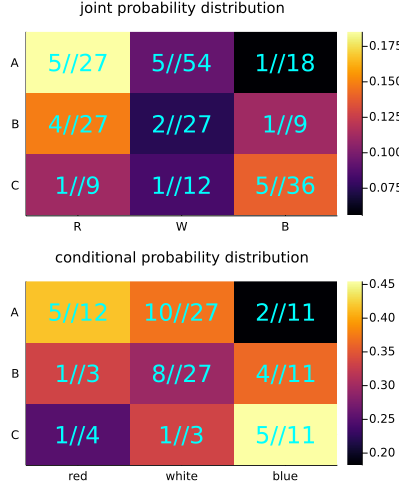

In [10]:
display(sum(Z; dims=1))
plot(O1, O2; size=(400, 500), layout=(2, 1))

In [11]:
for k in 1:3
    @eval @show $(Z[k,:]) / $(sum(Z; dims=1)[k])
end

Rational{Int64}[5//27, 5//54, 1//18] / 4//9 = Rational{Int64}[5//12, 5//24, 1//8]
Rational{Int64}[4//27, 2//27, 1//9] / 1//4 = Rational{Int64}[16//27, 8//27, 4//9]
Rational{Int64}[1//9, 1//12, 5//36] / 11//36 = Rational{Int64}[4//11, 3//11, 5//11]


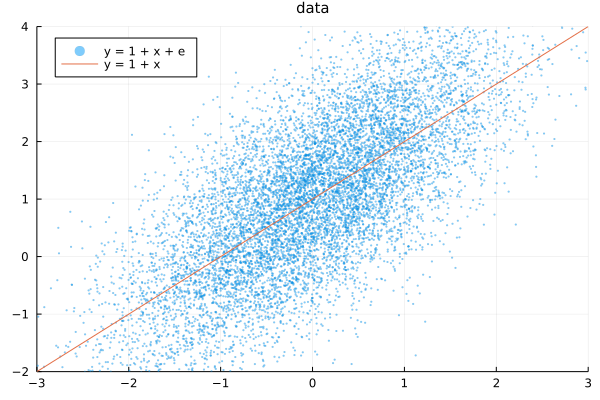

In [12]:
n = 10^6
x = randn(n)
e = randn(n)
y = @. 1 + x + e

m = 10^4
xbin = -3:0.25:3
ybin = -2:0.25:4

P0 = scatter(x[1:m], y[1:m]; label="y = 1 + x + e", ms=2, ma=0.5, msw=0)
plot!(x -> 1 + x; label="y = 1 + x")
plot!(legend=:topleft, colorbar=false)
plot!(xlim=extrema(xbin), ylim=extrema(ybin))
title!("data")

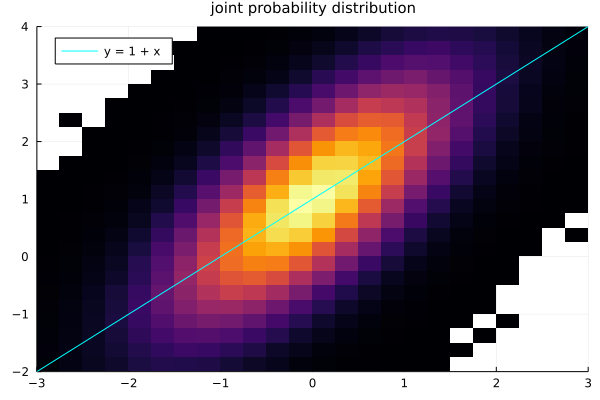

In [13]:
h = Plots._make_hist((x, y), (xbin, ybin); normed=true)

P1 = plot(h)
plot!(x -> 1 + x; label="y = 1 + x", c=:cyan)
plot!(legend=:topleft, colorbar=false)
plot!(xlim=extrema(xbin), ylim=extrema(ybin))
title!("joint probability distribution")

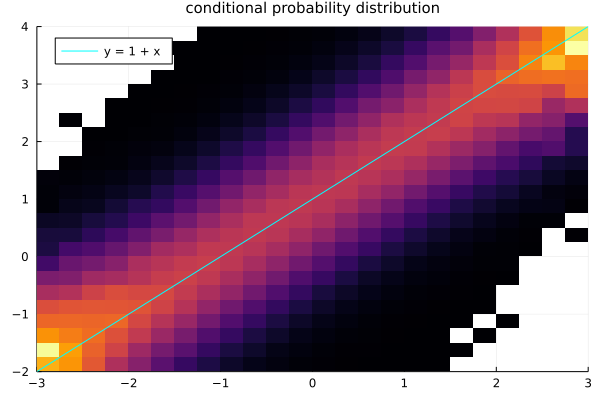

In [14]:
H = deepcopy(h)
H.weights = safediv.(h.weights, sum(h.weights; dims=2))

P2 = plot(H)
plot!(x -> 1 + x; label="y = 1 + x", c=:cyan)
plot!(legend=:topleft, colorbar=false)
plot!(xlim=extrema(xbin), ylim=extrema(ybin))
title!("conditional probability distribution")

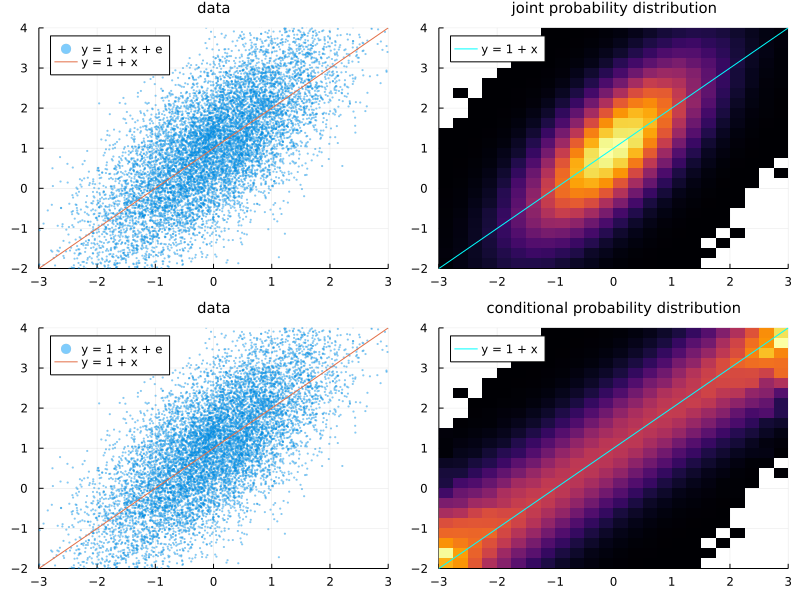

In [15]:
plot(P0, P1, P0, P2; size=(800, 600), layout=(2, 2))